## Notebook dedicado a demonstrar os melhores resultados obtidos pela equipe

### Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from linear_models import *
from utils import *

### Pre-processamento dos dados 

In [11]:
new_train_df = pd.read_csv('./dados/train_reduced.csv')
new_test_df = pd.read_csv('./dados/test_reduced.csv')

In [12]:
new_train_df = pd.read_csv('./dados/train_reduced.csv')
new_test_df = pd.read_csv('./dados/test_reduced.csv')

X_train = new_train_df[['intensidade', 'simetria']]
X_train = X_train.to_numpy()
X_train = np.c_[np.ones(X_train.shape[0]), X_train]

X_test = new_test_df[['intensidade', 'simetria']]
X_test = X_test.to_numpy()
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

y_train = new_train_df['label']
y_train = y_train.to_numpy()

y_test = new_test_df['label']
y_test = y_test.to_numpy()

### Resultados dos classificadores Um contra todos

#### Regressão Linear

Resultados - Linear Regression
              precision    recall  f1-score   support

           0     1.0000    0.9495    0.9741       218
           1     1.0000    1.0000    1.0000       292
           4     0.9273    0.9745    0.9503       314
           5     0.9336    0.9175    0.9255       291

    accuracy                         0.9614      1115
   macro avg     0.9652    0.9604    0.9625      1115
weighted avg     0.9622    0.9614    0.9615      1115



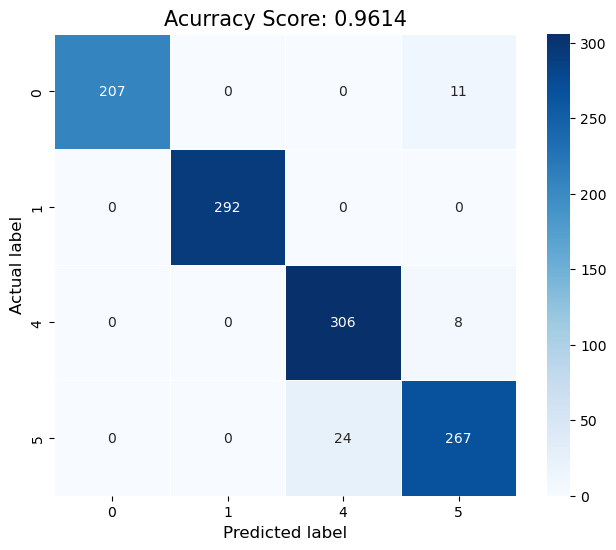

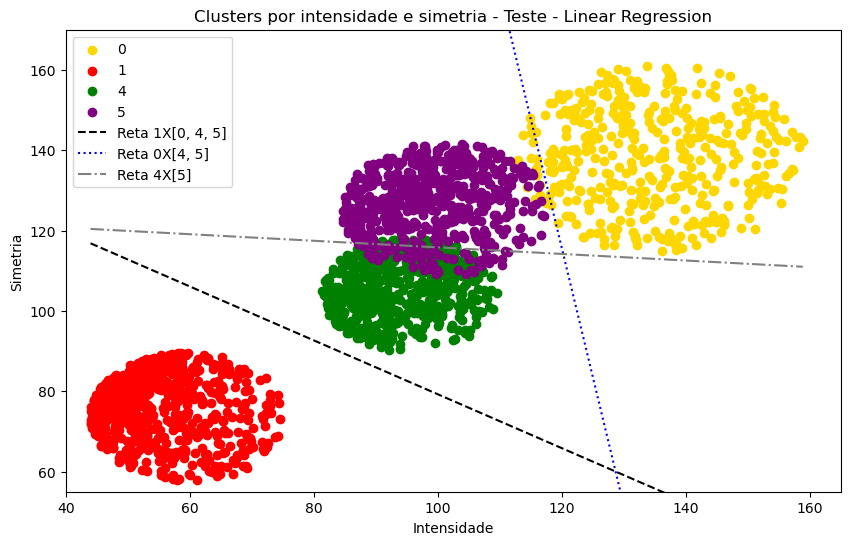

In [10]:
best_digits_linear_reg = [1, 0, 4, 5]

lr = LinearRegression()

modelo_linreg = Um_contra_todos(lr, best_digits_linear_reg)
modelo_linreg.execute(X_train, y_train)
all_w_linreg = modelo_linreg.get_all_w()
y_pred_linreg = modelo_linreg.predict_digit(X_test)


print('Resultados - ' + str(lr))
metrics = Metrics_multiclass(best_digits_linear_reg)
metrics.print_metrics_multiclass(y_test, ypred)

title_linreg = 'Clusters por intensidade e simetria - Teste - ' + str(lr)

plot_classification_digits(new_train_df, best_digits_linear_reg, ['red', 'gold', 'green', 'purple'], title_linreg, W=all_w_linreg[:4])

#### Perceptron Pocket

100%|██████████| 30000/30000 [05:48<00:00, 85.98it/s] 


Resultados - Pocket PLA
              precision    recall  f1-score   support

           0     0.9906    0.9679    0.9791       218
           1     1.0000    1.0000    1.0000       292
           4     0.9331    0.9777    0.9549       314
           5     0.9502    0.9175    0.9336       291

    accuracy                         0.9659      1115
   macro avg     0.9685    0.9658    0.9669      1115
weighted avg     0.9663    0.9659    0.9659      1115



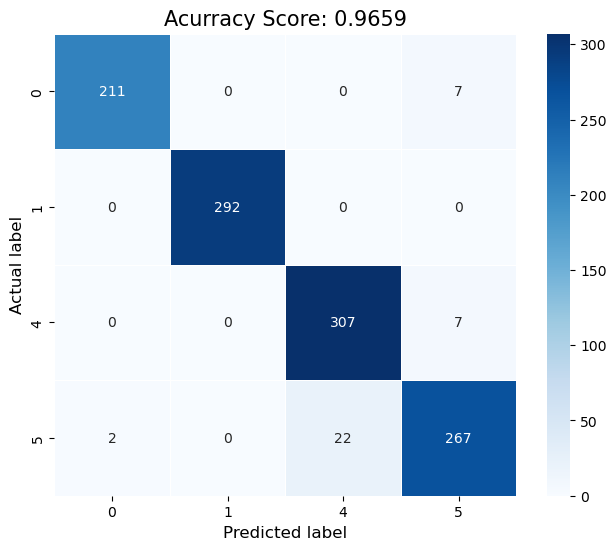

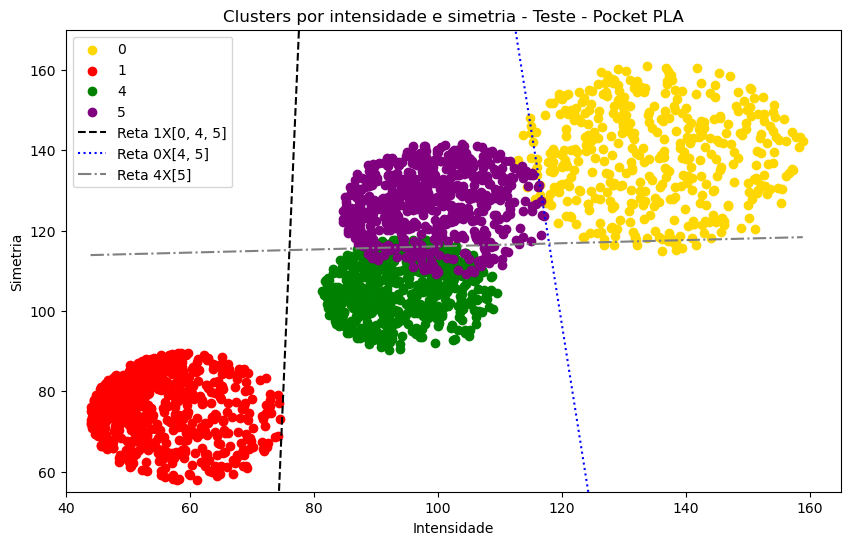

In [15]:
best_digits_pla =  [1, 0, 4, 5]

Nmin = np.ceil(X_train.shape[0] * 0.5).astype(int)
Nmax = np.ceil(X_train.shape[0] * 1.0).astype(int) - 1
best_iter = 30000
lr = PocketPLA(best_iter, Nmin=Nmin, Nmax=Nmax)

modelo_pla = Um_contra_todos(lr, best_digits_pla)
modelo_pla.execute(X_train, y_train)
all_w_pla = modelo_pla.get_all_w()
y_pred_pla = modelo_pla.predict_digit(X_test)


print('Resultados - ' + str(lr))
metrics = Metrics_multiclass(best_digits_pla)
metrics.print_metrics_multiclass(y_test, ypred)

title_pla = 'Clusters por intensidade e simetria - Teste - ' + str(lr)
plot_classification_digits(new_train_df, best_digits_pla, ['red', 'gold', 'green', 'purple'], title_pla, W=all_w_pla[:4])

#### Regressão Logística

100%|██████████| 3000000/3000000 [04:03<00:00, 12302.90it/s]


Resultados - Logistic Regression
              precision    recall  f1-score   support

           0     0.9909    0.9954    0.9931       218
           1     1.0000    1.0000    1.0000       292
           4     0.8864    0.9936    0.9369       314
           5     0.9881    0.8557    0.9171       291

    accuracy                         0.9596      1115
   macro avg     0.9663    0.9612    0.9618      1115
weighted avg     0.9631    0.9596    0.9593      1115



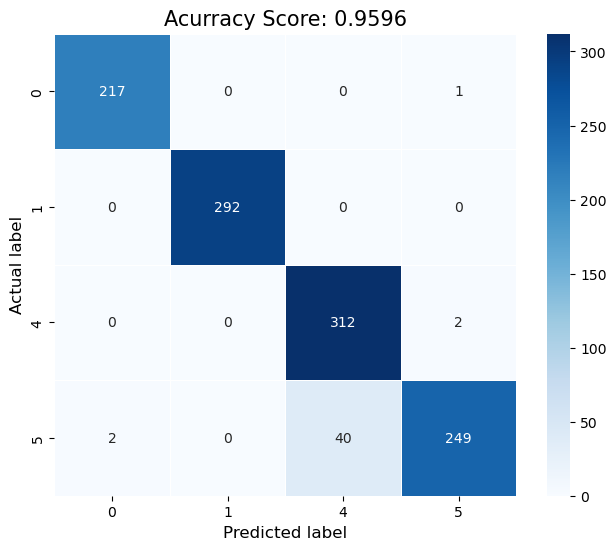

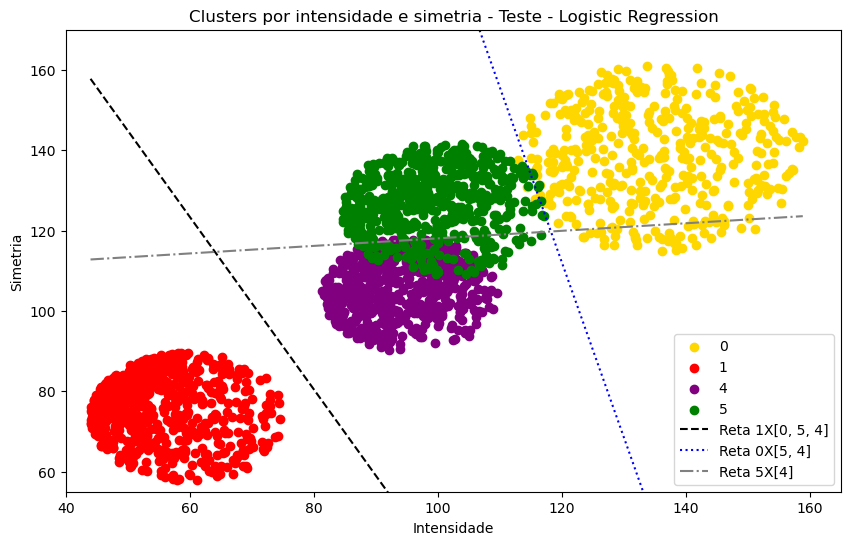

In [5]:
best_digits_logreg = [1, 0, 5, 4]

best_iter = 3000000
lr = LogisticRegression(tmax=best_iter, batch_size=128)

modelo_logreg = Um_contra_todos(lr, best_digits_logreg)
modelo_logreg.execute(X_train, y_train)
all_w_logreg = modelo_logreg.get_all_w()
y_pred_logreg = modelo_logreg.predict_digit(X_test)

print('Resultados - ' + str(lr))
metrics = Metrics_multiclass(best_digits_logreg)
metrics.print_metrics_multiclass(y_test, ypred)

title_logreg = 'Clusters por intensidade e simetria - Teste - ' + str(lr)
plot_classification_digits(new_train_df, best_digits_logreg, ['red', 'gold', 'green', 'purple'], title_logreg, W=all_w_logreg[:4])

### Resultado final do projeto

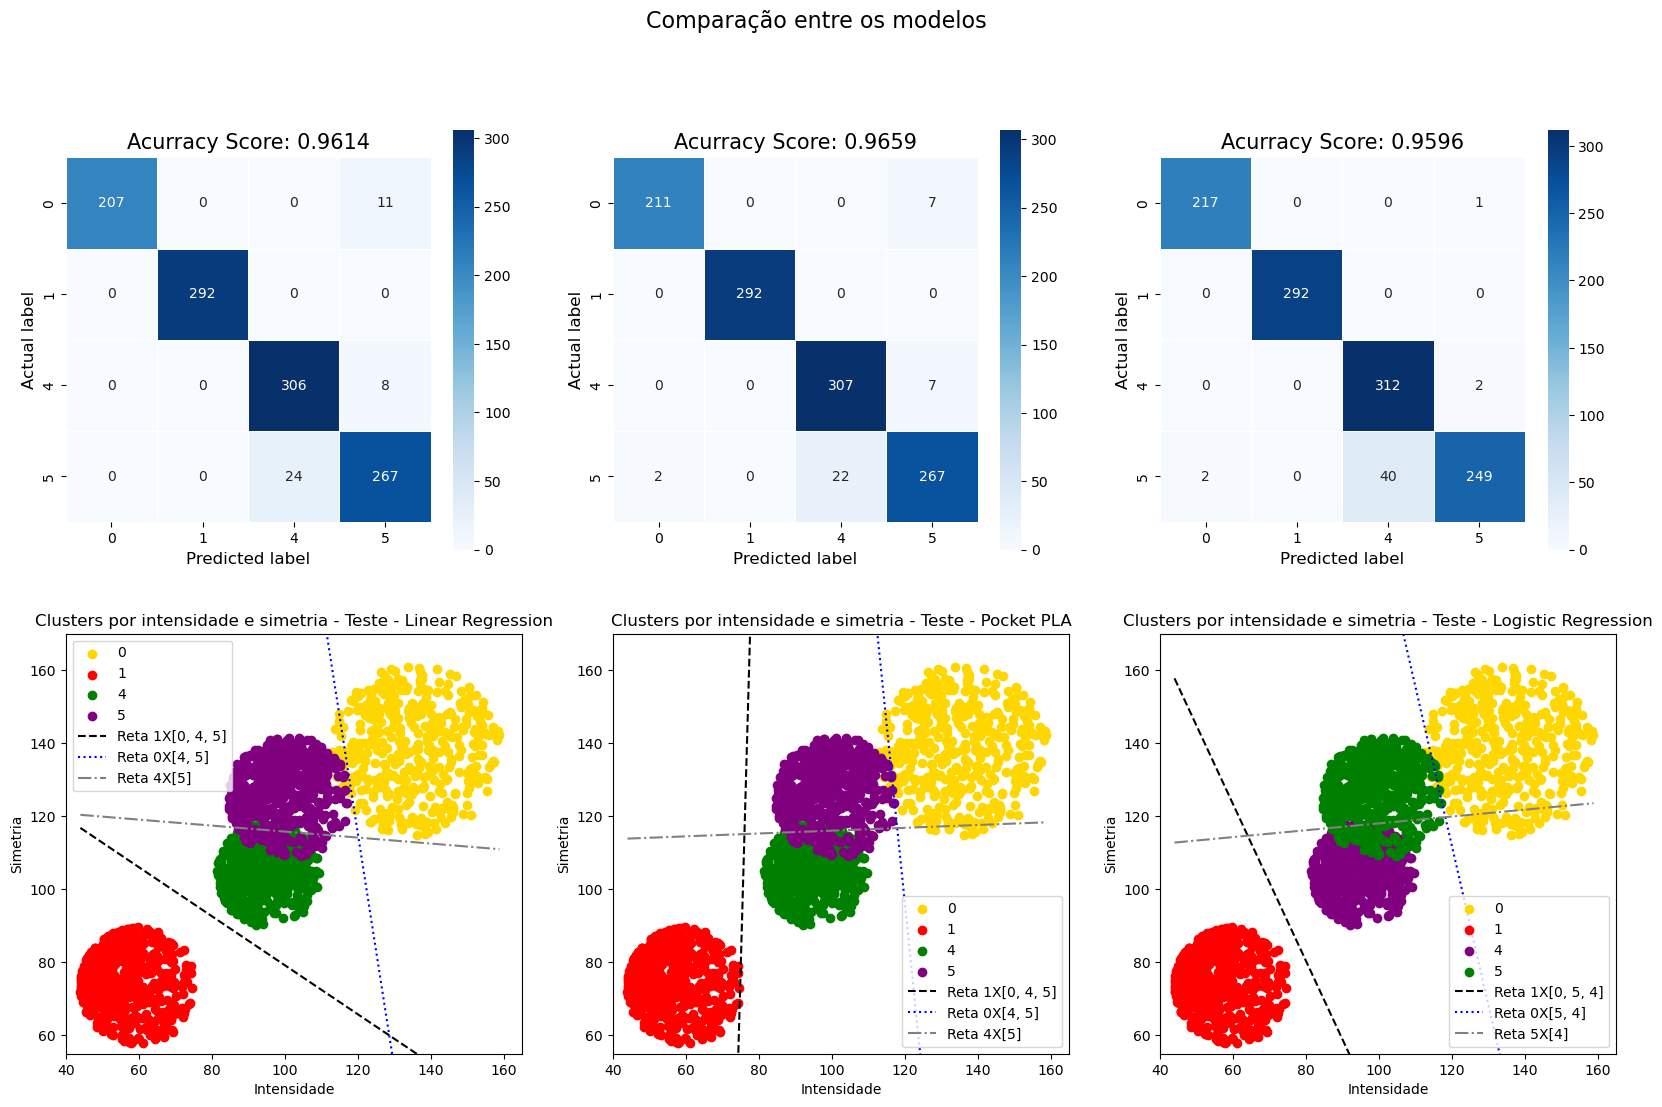

In [16]:
fig, axs = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Comparação entre os modelos', fontsize=16)

# confusion matrix
axs[0, 0].set_title('Linear Regression')
confusion_matrix_plot(y_test, y_pred_linreg, ax=axs[0, 0])
axs[0, 1].set_title('Pocket PLA')
confusion_matrix_plot(y_test, y_pred_pla, ax=axs[0, 1])
axs[0, 2].set_title('Logistic Regression')
confusion_matrix_plot(y_test, y_pred_logreg, ax=axs[0, 2])


# classification digits
axs[1, 0].set_title('Linear Regression')
plot_classification_digits(new_train_df, best_digits_linear_reg, ['red', 'gold', 'green', 'purple'], title_linreg, ax=axs[1, 0], W=all_w_linreg[:4])
axs[1, 1].set_title('Pocket PLA')
plot_classification_digits(new_train_df, best_digits_pla, ['red', 'gold', 'green', 'purple'], title_pla, ax=axs[1, 1], W=all_w_pla[:4])
axs[1, 2].set_title('Logistic Regression')
plot_classification_digits(new_train_df, best_digits_logreg, ['red', 'gold', 'green', 'purple'], title_logreg, ax=axs[1, 2], W=all_w_logreg[:4])

plt.show()
